In [2]:
import tensorflow as tf #solo la utilizo para cargar los datos de MNIST
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Cargar los datos obtenidos desde MNIST
(datos_imagenes, etiquetas), (_, _) = tf.keras.datasets.mnist.load_data()

#normalizan las imagenes
#se tienen valores de 0 a 255, lo que afecta a la hora de los calculos
datos_imagenes = datos_imagenes.astype('float32') / 255.0

# Se cambia el formeto de la imagen ya que esta en 28x28
#se pasa a un vector de 784 elementos
X = datos_imagenes.reshape(datos_imagenes.shape[0], -1)

#Se almacena las etiquetas en Y
Y = etiquetas.astype('uint8')
#se evalua Y como booleano para asi obtener si es un 0
#para cambiar la etiquta de 0 por un 10
#de caso contrario se mantienen las etiquetas originales
Y = (Y == 0) * 10 + (Y != 0) * Y

#Almaceno a X y a Y en un diccionario
ex3data1 = {'X': X, 'Y': Y }

#imprimir X y y por separado
print("X:", ex3data1['X'])
print("Y:", ex3data1['Y'])

#imprimir los valores de la imagen
print(X[5000].reshape(28, 28))  #esto muestra la imagen en su formato original de 28x28
print(Y[5000]) #imprime la etiqueta

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y: [ 5 10  4 ...  5  6  8]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.     

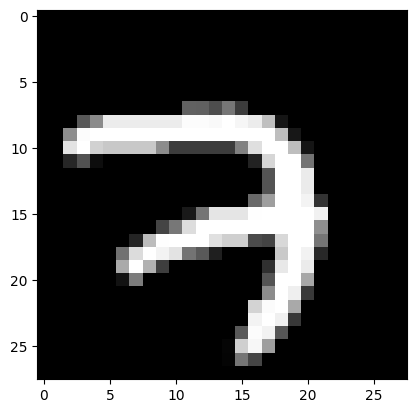

In [ ]:
#muestro en formtato de imagen cual es el numero en esa posicion
plt.imshow(X[5000].reshape(28, 28), cmap='gray')
plt.show()

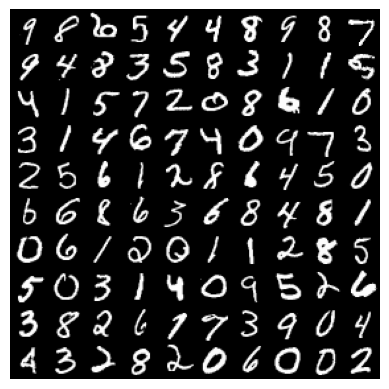

In [4]:
#funcion para mostrar imagenes obtenidas de MNIST
def displayData(X):
    #se obtiene el numero de imagenes que se van a mostrar
    # m - numero de imagenes
    # n - numero de pixeles
    m, n = X.shape
    #asumimos que son imagenes cuadradas
    ancho_imagen = int(np.sqrt(n))  #28 pixeles
    altura_imagen = n // ancho_imagen  #28 pixeles
    filas = int(np.floor(np.sqrt(m)))  #numero de filas
    columnas = int(np.floor(m / filas))  #numero de columnas

    #Creamos una matriz para visualizar las imagenes
    display_imagenes = -np.ones((altura_imagen * filas, ancho_imagen * columnas))

    #ubicamos a cada imagen en su area que se va a imprimir
    imagen_actual = 0
    for i in range(filas):
        for j in range(columnas):
            if imagen_actual >= m:
                break
            image = X[imagen_actual, :].reshape(altura_imagen, ancho_imagen)*255
            display_imagenes[i*altura_imagen:(i+1)*altura_imagen, j*ancho_imagen:(j+1)*ancho_imagen] = image
            imagen_actual += 1

    # Mostrar la imagen
    plt.imshow(display_imagenes, cmap='gray')
    plt.axis('off')
    plt.show()

#selecciona 100 imagenes aleatoriamente desde nuestro conjunto de imagenes en X
random_indices = np.random.choice(X.shape[0], 100, replace=False)
random_imagenes = X[random_indices]

#se muestran 100 imagenes seleccionadas aleatoriamente
displayData(random_imagenes)



In [8]:
#función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
#funcion de costo
def lrCostFunction(theta, X, Y, t_regular):
    m=len(Y)  #num de ejemplos
    #calcular h_theta(x) = g(X * theta)
    h = sigmoid(np.dot(X, theta))
    #funcion de costo sin regularizacion
    cost = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    #Agregamos el termino de regularización (ignorar theta[0])
    reg_term = (t_regular / (2 * m)) * np.sum(theta[1:] ** 2)
    cost += reg_term

    return cost

In [10]:
# Gradiente de la función de costo
def lrGradient(theta, X, y):
    m = len(y) #num ejemplo
    h = sigmoid(np.dot(X, theta)) #calcula la hipotesis de h_tetha(X) ->probabilidades predichas por el modelo
    grad = (1/m) * np.dot(X.T, (h - y)) #valor del gradiente
    return grad

#Sescenso del gradiente
def gradientDescent(X, Y, theta, alpha, num_iters, t_regular):
    m = len(Y) #numero de ejemplos
    costo_historico = np.zeros(num_iters)

    for i in range(num_iters):
        grad = lrGradient(theta, X, Y)  # Calcular el gradiente
        theta = theta - alpha * grad  # Actualizar los parámetros
        costo_historico[i] = lrCostFunction(theta, X, Y, t_regular)  # Guardar el costo

    return theta, costo_historico

In [11]:
def oneVsAll(X, Y, num_etiquetas, alpha, num_iters, t_regular):
    # m - numero de ejemplos
    # n - numero de caracteristicas
    m, n = X.shape
    # Agregar una columna de unos a X ->para el término independiente
    X = np.hstack([np.ones((m, 1)), X])
    #se inicializa la matriz de 0 donde cada fila corresponde a un clasificador
    all_theta = np.zeros((num_etiquetas, n + 1))

    # Entrenar un clasificador para cada clase
    for k in range(1, num_etiquetas + 1):
        # Crear etiquetas binarias para la clase k
        Y_binarias = (Y == k).astype(int)

        #inicializar los parametros theta
        tetha_inicial = np.zeros(n + 1)

        # Entrenar el clasificador usando descenso del gradiente
        theta, _ = gradientDescent(X, Y_binarias, tetha_inicial, alpha, num_iters, t_regular)

        #Se almacenan los parametros aprendidos para cada clase (numero 0-9)
        all_theta[k - 1, :] = theta

    return all_theta


In [12]:
def predictOneVsAll(all_theta, X):
    # m - numero de ejmplos
    m = X.shape[0]
    #Agregar la columan de unos
    X = np.hstack([np.ones((m, 1)), X])

    #Calcular las probabilidades para cada clase
    probabilidades = sigmoid(np.dot(X, all_theta.T))

    #clase con mas probabilidad para cada ejemplo
    prediccion = np.argmax(probabilidades, axis=1) + 1  # Sumar 1 porque las clases están numeradas desde 1

    return  prediccion


In [13]:
num_etiquetas = 10 # Numero de clases
alpha = 1  #tasa de aprendizaje
num_iters = 500  #iteraciones
t_regular = 1  #parametro de regularizacion

# Entrenar los clasificadores
all_theta = oneVsAll(X, Y, num_etiquetas, alpha, num_iters, t_regular)

In [14]:
#realizar predicciones del entrenamiento de los clasificadores
prediccion = predictOneVsAll(all_theta, X)

#calcular precisión del modelo
precision = np.mean(prediccion == Y) * 100
print(f"Precisión del modelo: {precision:.2f}%")

Precisión del modelo: 91.08%


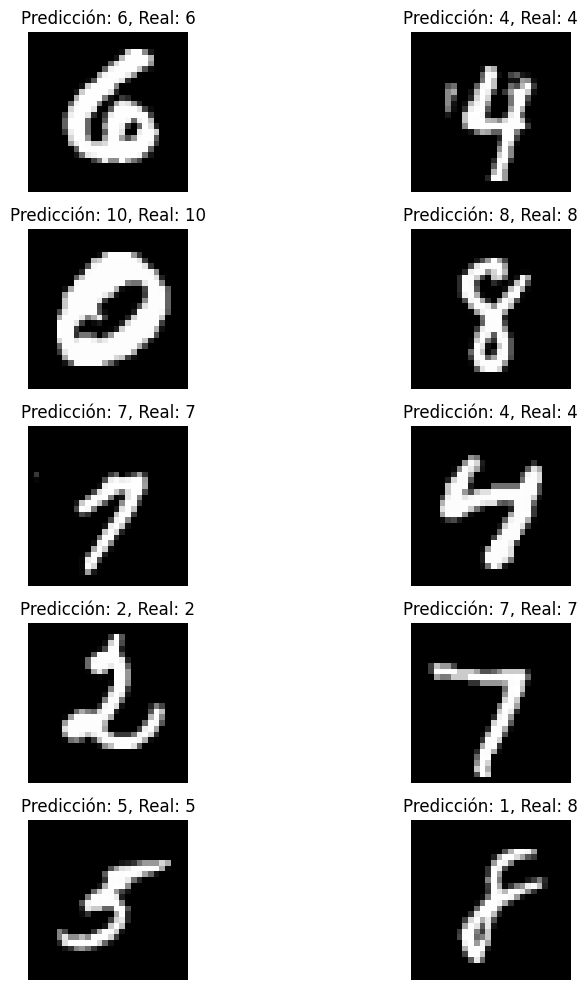

In [15]:
#Visualiza algunas imagenes con sus predicciones que obtienen y la etiqueta real
def visualize_predictions(X, Y, prediccion, num_ejemplos):
    # Selecciona aleatoriamente un número de ejemplos
    random_indices = np.random.choice(X.shape[0], num_ejemplos, replace=False)

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(random_indices): #itera sobre los indices que se obtuviero aleatoreamente
        plt.subplot(5, 2, i + 1) #se divide la imagen en una cuaricula de 5x2
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')  #mostrar la imagen
        plt.title(f"Predicción: {prediccion[idx]}, Real: {Y[idx]}")  #prediccion y etiqueta real
        plt.axis('off')  # Ocultar los ejes X y Y
    plt.tight_layout() #hace que no se sobrepongan las imagenes
    plt.show()

# Visualizar 10 oredicciones
num_ejemplos = 10
visualize_predictions(X, Y, prediccion, num_ejemplos)
